In [1]:
# import all the libraries we are going to use
import pandas as pd
import geopandas as gpd
import shapely

# plotting configuration
import matplotlib.pyplot as plt

# Geoviews
#import geoviews as gv
#import hvplot.pandas

%matplotlib inline

In [2]:
# First thing to note is that many geospatial python packages are under active development
# and updated regularly. So the version you're using today will likely be updated in the near 
# future!
print('Pandas version: ', pd.__version__) #0.24.2
print('Geopandas version: ', gpd.__version__) #0.5.0

Pandas version:  0.24.2
Geopandas version:  0.4.1


In [7]:
census_df = pd.read_csv('../../data/block_group_census_estimates_wide_original_bins.csv')
census_df.head()

,fips_code,county_name,county,tract,block_group,households,inc_000_010k,inc_010_015k,inc_015_020k,inc_020_025k,...,mean_inc,med_age,med_inc,pc_income,population,race_nonhisp_asian,race_nonhisp_white,trans_carpool,trans_drivealone,trans_transit
0,530330001001,King,33,100,1,608,0.128289,0.000000,0.000000,0.024671,...,170745.871711,54.0,118026.0,82066.0,1265,0.076680,0.877470,0.101025,0.610542,0.120059
1,530330001002,King,33,100,2,758,0.088391,0.098945,0.025066,0.023747,...,59597.316623,37.0,46645.0,29449.0,1534,0.076923,0.501304,0.075736,0.607293,0.234222
2,530330001003,King,33,100,3,724,0.135359,0.092541,0.085635,0.056630,...,80377.153315,36.4,63000.0,32027.0,1817,0.135388,0.597688,0.102662,0.567490,0.245247
3,530330001004,King,33,100,4,1052,0.140684,0.042776,0.100760,0.123574,...,42035.998099,29.3,35271.0,19481.0,2270,0.140529,0.285463,0.112371,0.538144,0.231959
4,530330001005,King,33,100,5,637,0.058085,0.067504,0.067504,0.117739,...,56330.312402,34.4,36250.0,33317.0,1077,0.246982,0.635097,0.285494,0.393519,0.177469


## GEOPANDAS

In [9]:
# Commonly, there at latitude, longitude columns for places, but we must tell geopandas 
# explicity what the geometries (Points) and coordinate reference is (EPSG:4326)
# https://geopandas.readthedocs.io/en/latest/projections.html#coordinate-reference-systems

crs = {'init': 'epsg:4326'}
census_bgs = gpd.read_file('../../data/block-groups/block-groups.shp')

In [ ]:
census_bgs.head()

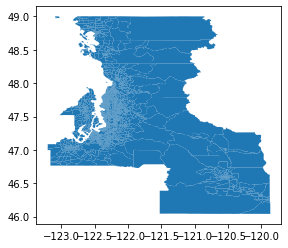

In [10]:
census_bgs.plot()

In [ ]:
census_bgs.dtypes

In [ ]:
census_df.dtypes

In [11]:
census_bgs_numeric = census_bgs.convert_objects(convert_numeric=True)
census_bgs_numeric.dtypes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use GeoDataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


fips_code     int64
geometry     object
dtype: object

In [12]:
census_bgs_join = census_bgs_numeric.merge(census_df, on='fips_code')
census_bgs_join.head()

,fips_code,geometry,county_name,county,tract,block_group,households,inc_000_010k,inc_010_015k,inc_015_020k,...,mean_inc,med_age,med_inc,pc_income,population,race_nonhisp_asian,race_nonhisp_white,trans_carpool,trans_drivealone,trans_transit
0,530330001001,"POLYGON ((-122.289753 47.733732, -122.285957 4...",King,33,100,1,608,0.128289,0.000000,0.000000,...,170745.871711,54.0,118026.0,82066.0,1265,0.076680,0.877470,0.101025,0.610542,0.120059
1,530330001002,"POLYGON ((-122.296527 47.730149, -122.292313 4...",King,33,100,2,758,0.088391,0.098945,0.025066,...,59597.316623,37.0,46645.0,29449.0,1534,0.076923,0.501304,0.075736,0.607293,0.234222
2,530330001003,"POLYGON ((-122.292266 47.726474, -122.28956 47...",King,33,100,3,724,0.135359,0.092541,0.085635,...,80377.153315,36.4,63000.0,32027.0,1817,0.135388,0.597688,0.102662,0.567490,0.245247
3,530330001004,"POLYGON ((-122.29652 47.733784, -122.292435 47...",King,33,100,4,1052,0.140684,0.042776,0.100760,...,42035.998099,29.3,35271.0,19481.0,2270,0.140529,0.285463,0.112371,0.538144,0.231959
4,530330001005,"POLYGON ((-122.296406 47.726509, -122.292266 4...",King,33,100,5,637,0.058085,0.067504,0.067504,...,56330.312402,34.4,36250.0,33317.0,1077,0.246982,0.635097,0.285494,0.393519,0.177469


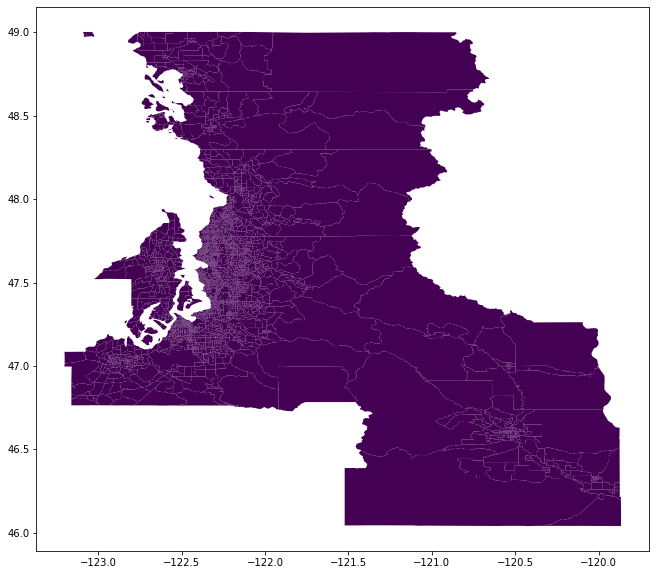

In [14]:
#census_bgs_join.plot()
census_bgs_join.plot(column='med_inc', figsize=(20,10))